In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

sns.set_context('talk')

### Generate data

In [105]:
mu1 = 2
std1 = 1

mu2 = -2
std2 = 1

class_1_points = np.random.normal([mu1, mu1], [std1, std1], size=(25, 2))
class_2_points = np.random.normal([mu2, mu2], [std2, std2], size=(25, 2))

df1 = pd.DataFrame(class_1_points, columns=['x1', 'x2'])
df1 = df1.assign(y=1)

df2 = pd.DataFrame(class_2_points, columns=['x1', 'x2'])
df2 = df2.assign(y=2)

df = pd.concat([df1, df2]).reset_index()

In [125]:
markers_list

['^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 '^',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o']

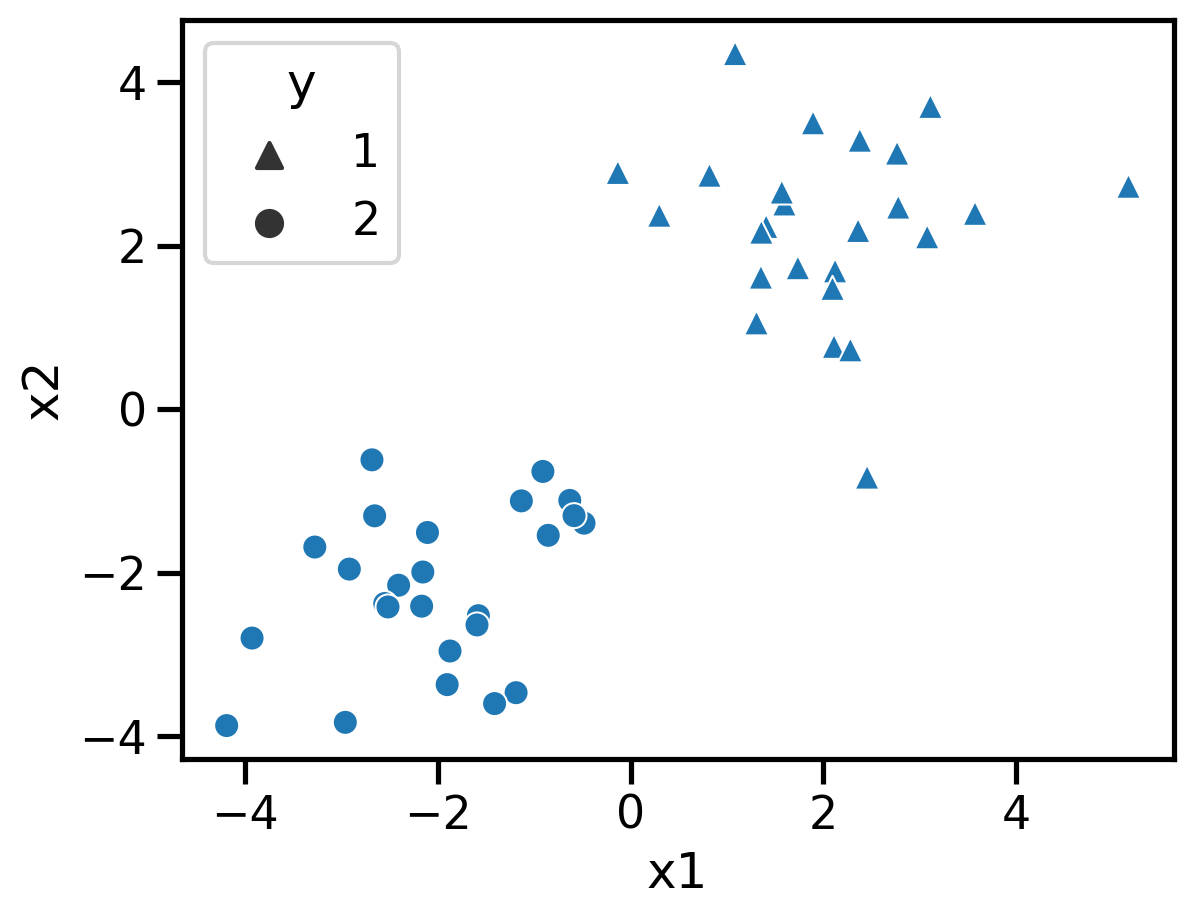

In [127]:
markers_list = ['^', 'o']

sns.scatterplot(df, x='x1', y='x2', style='y', markers=markers_list);

In [107]:
from sklearn.neighbors import NearestNeighbors

In [108]:
# z_new = np.array([-2, -2, 2])
# z_new = pd.Series(z_new, index=['x1', 'x2', 'y'])

In [168]:
def ncm(B, z):

    y = z[-1]

    # Points of same class
    nn = NearestNeighbors(n_neighbors=5)
    nn.fit(B[B.y == y].values)
    dists, indices = nn.kneighbors(z.reshape(1, -1))
    avg_dist_to_same_class = dists.mean()

    # Points of different class
    nn = NearestNeighbors(n_neighbors=5)
    nn.fit(B[B.y != y].values)
    dists, indices = nn.kneighbors(z.reshape(1, -1))
    avg_dist_to_other_class = dists.mean()

    ratio = avg_dist_to_same_class / avg_dist_to_other_class
    
    # print(f"{avg_dist_to_same_class=}, {avg_dist_to_other_class=}, {ratio=}")
    
    return ratio

In [169]:
alphas = []
for idx in range(len(df)):
    alphas.append(ncm(df.drop(index=idx), df.iloc[idx].values))

df = df.assign(alpha=alphas)

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by NearestNeighbors.

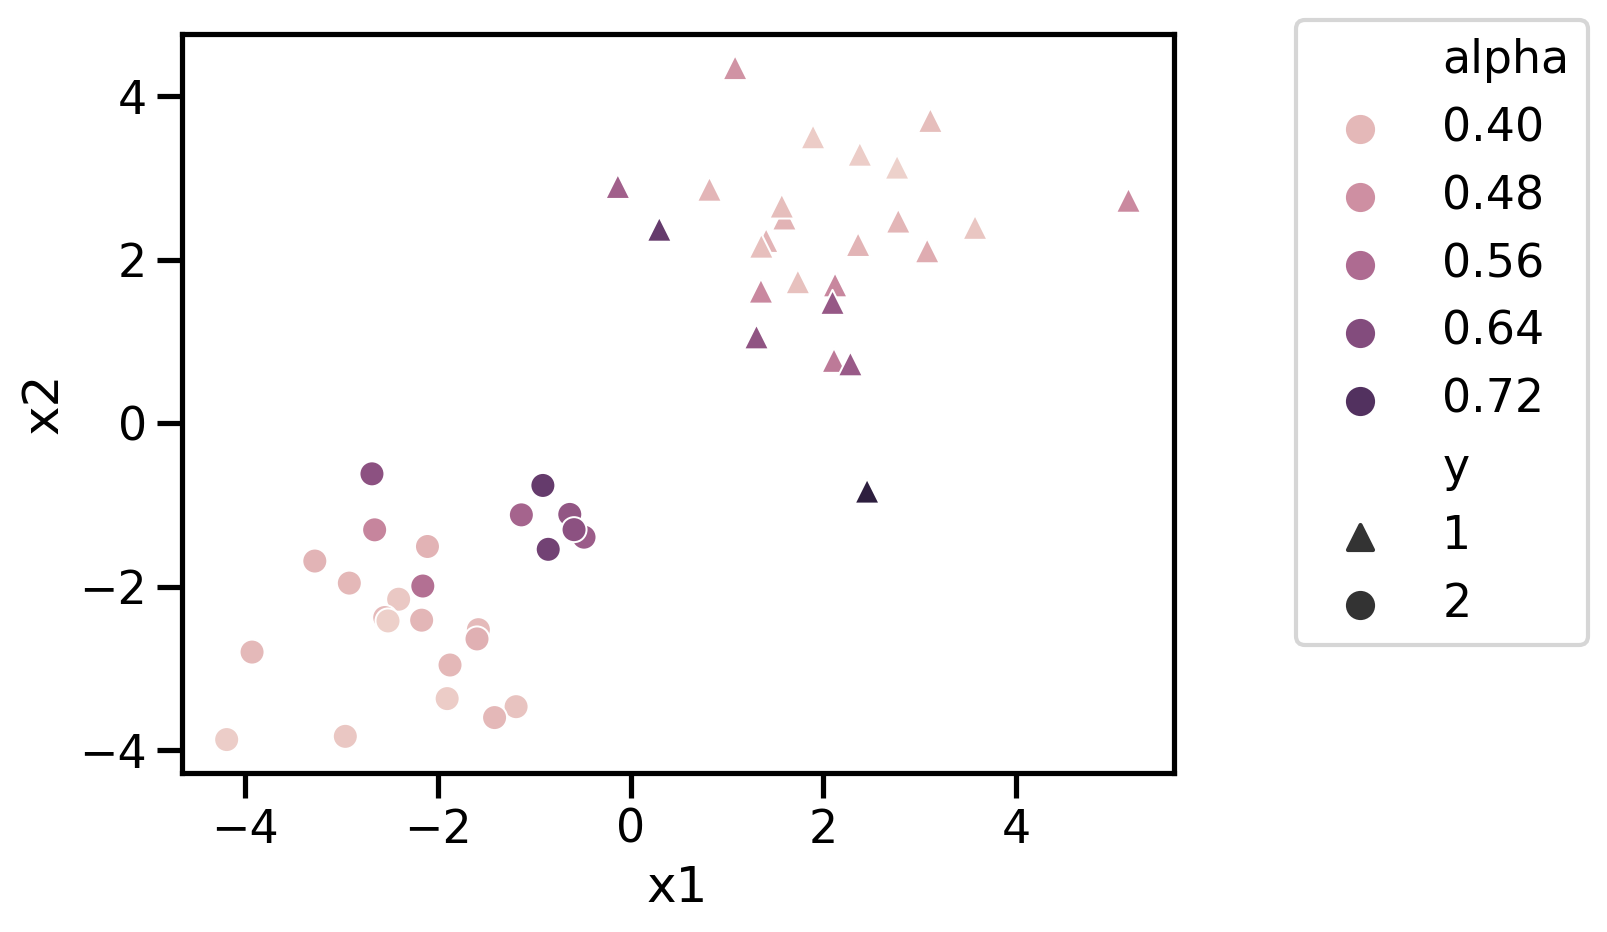

In [160]:
sns.scatterplot(df, x='x1', y='x2', style='y', hue='alpha', markers=['^', 'o']);
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [186]:
def conformal_prediction(nonconformity_function, eps, B, x, y):

    z_new = pd.Series(np.append(x, y), index=['x1', 'x2', 'y'])

    B = pd.concat([B, z_new.to_frame().T]).reset_index(drop=True)

    n = len(B)
    alphas = []
    for i in range(0, n):
        alpha = ncm(B.drop(index=i), B.iloc[i].values)
        alphas.append(alpha)

    alpha_n = alphas[-1]
    print(f'Alpha_n: {alpha_n}, when y: {y}')
    p_y = sum(pd.Series(alphas) >= alpha_n) / n

    return p_y, alphas

In [187]:
x = np.array([-5, -5])
y = 2

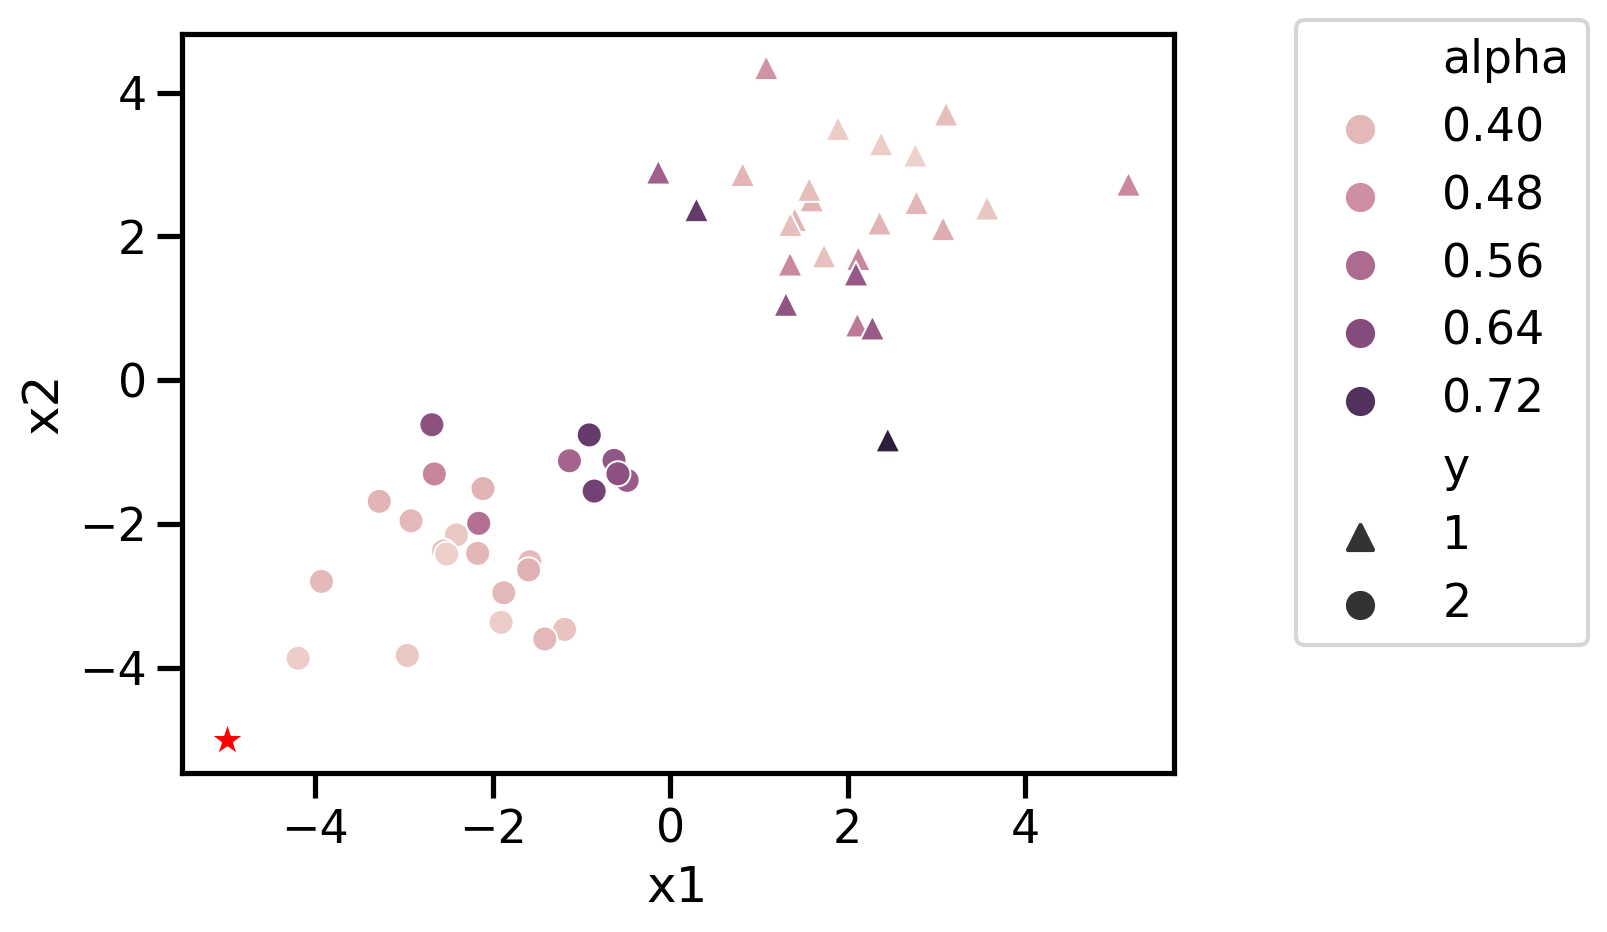

In [188]:
sns.scatterplot(df, x='x1', y='x2', style='y', hue='alpha', markers=['^', 'o']);
sns.scatterplot(x=[x[0]], y=[x[1]], color='red', marker='*', s=200)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [189]:
pys = []
alpha_dict = {}
for y_ in [1, 2]:
    py, alphas = conformal_prediction(ncm, 0.05, df[['x1', 'x2', 'y']], x, y_)
    pys.append(py)
    alpha_dict[y_] = alphas

eps_min = min(pys)
confidence_region_prediction_contains_1_class = 1 - eps_min
print('Confidence region prediction contains 1 class: ', confidence_region_prediction_contains_1_class)

eps_max = max(pys)
credibility = eps_max
print('Credibility: ', credibility)


Alpha_n: 3.1334573936804198, when y: 1
Alpha_n: 0.294905651808915, when y: 2
Confidence region prediction contains 1 class:  0.9803921568627451
Credibility:  0.0784313725490196


In [172]:
pys

[0.0196078431372549, 0.0784313725490196]

In [175]:
(df.alpha > 0.294905651808915).sum()

50

In [191]:
alpha_dict[1]

[0.2567087162729769,
 0.13558745465902147,
 0.12987468821938575,
 0.11315933671334957,
 0.3174220277334672,
 0.15129967478179498,
 0.10127998663693809,
 0.12348697129438489,
 0.26014396133596146,
 0.1688240550005086,
 0.17216493155487378,
 0.27259091825437143,
 0.14372128668237946,
 0.30577920493767635,
 0.6165602376091541,
 0.20575321690140802,
 0.14151014377336424,
 0.13502222050378118,
 0.12231018681997621,
 0.1849336600354966,
 0.1069318448528498,
 0.17909432071711945,
 0.13225547176061503,
 0.15971938954791967,
 0.22129985731897353,
 0.25210262658316296,
 0.144455056923933,
 0.11006977338152561,
 0.0703041004295762,
 0.1557317994235592,
 0.17931279373728592,
 0.22132896417617395,
 0.11115337361458004,
 0.12333243298289127,
 0.13533990609982174,
 0.15061667993565664,
 0.07086682930503183,
 0.1419913000875803,
 0.11480570650831366,
 0.08468865148347199,
 0.10984916315746443,
 0.1610307910667403,
 0.07270030495401757,
 0.11711268477299264,
 0.12914698992824733,
 0.2819463294808852,
 

In [192]:
alpha_dict[2]

[0.2567087162729769,
 0.13558745465902147,
 0.12987468821938575,
 0.11315933671334957,
 0.3174220277334672,
 0.15129967478179498,
 0.10127998663693809,
 0.12348697129438489,
 0.26014396133596146,
 0.1688240550005086,
 0.17216493155487378,
 0.27259091825437143,
 0.14372128668237946,
 0.30577920493767635,
 0.6165602376091541,
 0.20575321690140802,
 0.14151014377336424,
 0.13502222050378118,
 0.12231018681997621,
 0.1849336600354966,
 0.1069318448528498,
 0.17909432071711945,
 0.13225547176061503,
 0.15971938954791967,
 0.22129985731897353,
 0.25210262658316296,
 0.144455056923933,
 0.10264849400662568,
 0.06631830714341491,
 0.15402430504399095,
 0.17931279373728592,
 0.1932150563413428,
 0.10367000449770937,
 0.11913886733489816,
 0.13533990609982174,
 0.14189122663555098,
 0.06575816351854497,
 0.13172996777086052,
 0.11480570650831366,
 0.07983866310459352,
 0.10984916315746443,
 0.14952652316658968,
 0.06745452830778755,
 0.11238150690689915,
 0.1182866206002666,
 0.21274588684154405

In [193]:
df.alpha # why are these alphas so different than the above two sets?

0     0.688361
1     0.495514
2     0.401492
3     0.408147
4     0.584843
5     0.422934
6     0.406618
7     0.387288
8     0.615225
9     0.361334
10    0.385908
11    0.471392
12    0.605631
13    0.492408
14    0.784334
15    0.524813
16    0.407320
17    0.358616
18    0.381577
19    0.405386
20    0.385290
21    0.372721
22    0.350113
23    0.493199
24    0.600983
25    0.624655
26    0.574613
27    0.399515
28    0.368443
29    0.409538
30    0.688256
31    0.397135
32    0.400164
33    0.394327
34    0.595462
35    0.378715
36    0.395473
37    0.397799
38    0.612203
39    0.402159
40    0.623619
41    0.406334
42    0.351861
43    0.413287
44    0.360559
45    0.358808
46    0.502451
47    0.371197
48    0.668595
49    0.545831
Name: alpha, dtype: float64

In [34]:
eps_min

0.0196078431372549

In [35]:
confidence_in_class_2 = 1 - eps_min 
confidence_in_class_2

0.9803921568627451

In [156]:
df = df.drop(columns=['index'])

In [166]:
# 